if we want that our linear regression achieve curve path also: then we use polynomial growth functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
y=np.arange(1,10,.5)
y2=y**2
y3=y**3

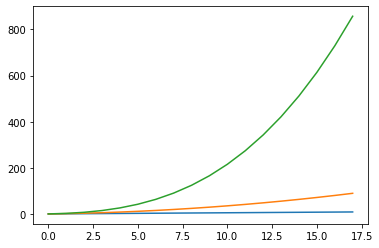

In [3]:
plt.plot(y)
plt.plot(y2)
plt.plot(y3)

In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/digipodium/Datasets/main/Position_Salaries.csv")
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


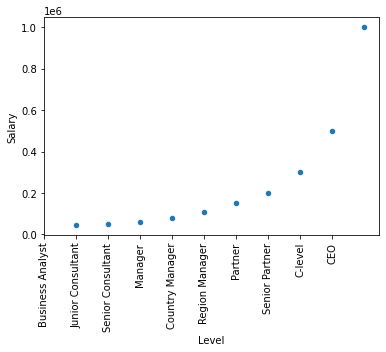

In [5]:
df.plot(kind='scatter',x='Level',y='Salary')
plt.xticks(df.index,df.Position,rotation=90)
plt.show()

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [7]:
X=df[['Level']]
y=df['Salary']

In [8]:
model_1=LinearRegression()
model_1.fit(X,y)

LinearRegression()

In [9]:
model_1.score(X,y) #not good

0.6690412331929895

In [10]:
df['pred_1']=model_1.predict(X)

merging of two graphs

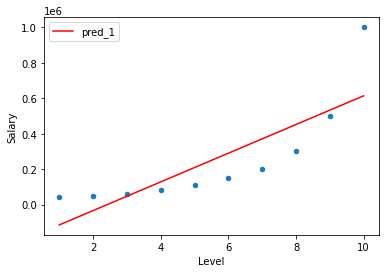

In [11]:
ax=df.plot(kind='scatter',x='Level',y='Salary')
df.plot(x='Level',y='pred_1',color='red',ax=ax)
plt.show()

In [12]:
#polynomial deature
def check_polynomial_regression(X,y,degree):
    pf=PolynomialFeatures(degree)
    pX=pf.fit_transform(X)
    model=LinearRegression()
    model.fit(pX,y)
    df[f'pred_{degree}']=model.predict(pf.transform(X))
    ax=df.plot(kind='scatter',x='Level',y='Salary')
    df.plot(x='Level',y=f'pred_{degree}',color='red',ax=ax)
    mae=mean_absolute_error(y,df[f'pred_{degree}'])
    print('degree',degree,'score',model.score(pf.transform(X),y),',mae=>',mae)
    
    plt.show()



degree 2 score 0.9162082221443942 ,mae=> 70218.1818181819


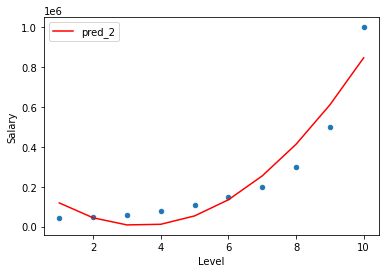

degree 3 score 0.9812097727913367 ,mae=> 34790.20979020849


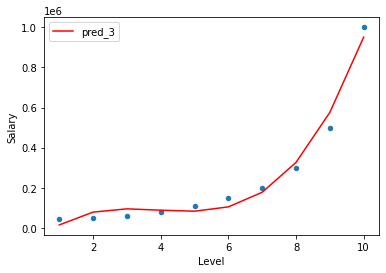

degree 4 score 0.9973922891706614 ,mae=> 12681.818181828241


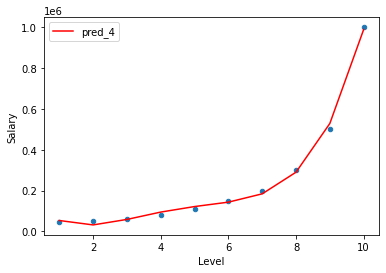

degree 5 score 0.9997969027099755 ,mae=> 3360.8391609136042


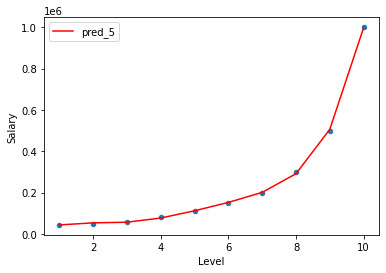

degree 6 score 0.9999494749253776 ,mae=> 1476.456877034186


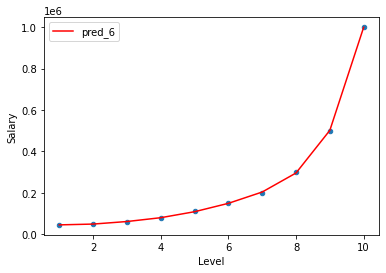

degree 7 score 0.9999770143729169 ,mae=> 1025.3805218842258


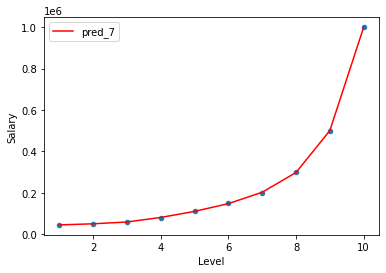

degree 8 score 0.9999934972438329 ,mae=> 531.7980781744933


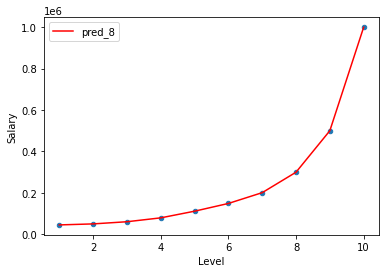

degree 9 score 0.9999999999999475 ,mae=> 0.03741494806017727


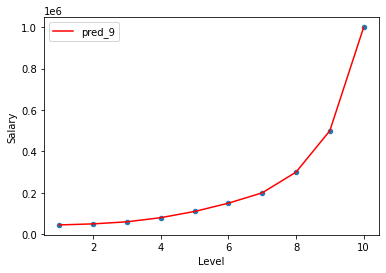

In [13]:
for i in range(2,10):
    check_polynomial_regression(X,y,i)

In [14]:
p=PolynomialFeatures(degree=8)
m=LinearRegression()
px=p.fit_transform(X)
m.fit(px,y)


LinearRegression()

In [15]:
df

,Position,Level,Salary,pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9
0,Business Analyst,1,45000,-114454.545455,118727.272727,14902.097902,53356.643357,43895.104896,45190.559444,44942.204709,45010.386158,4.499993e+04
1,Junior Consultant,2,50000,-33575.757576,44151.515152,78759.906760,31759.906760,53836.829837,49086.829840,50383.792695,49906.522240,4.999999e+04
2,Senior Consultant,3,60000,47303.030303,8439.393939,94960.372960,58642.191142,57065.268066,61383.449886,59010.283837,60373.921119,5.999999e+04
3,Manager,4,80000,128181.818182,11590.909091,88223.776224,94632.867133,77286.713287,79877.622380,81036.610504,79127.521799,7.999997e+04
4,Country Manager,5,110000,209060.606061,53606.060606,83270.396270,121724.941725,112263.403264,108808.857811,110354.175278,111308.720954,1.100000e+05
5,Region Manager,6,150000,289939.393939,134484.848485,104820.512821,143275.058275,152736.596737,149282.051285,147736.733832,148691.279286,1.500000e+05
6,Partner,7,200000,370818.181818,254227.272727,177594.405594,184003.496504,201349.650350,203940.559443,202781.571354,200872.481984,2.000000e+05
7,Senior Partner,8,300000,451696.969697,412833.333333,326312.354312,289994.172494,291571.095571,295889.277389,298262.443492,299626.079635,3.000000e+05
8,C-level,9,500000,532575.757576,610303.030303,575694.638695,528694.638695,506617.715617,501867.715613,500570.752778,500093.480176,5.000000e+05
9,CEO,10,1000000,613454.545455,846636.363636,950461.538462,988916.083916,998377.622376,999673.076909,999921.431520,999989.606648,1.000000e+06


EXAMPLE 2

In [23]:
df=pd.read_csv("processed_automobile.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [24]:
print(df.columns.tolist())

['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


In [25]:
df.sort_values(by='horsepower',inplace=True)


In [26]:
X=df[['horsepower']]
y=df['price']

<AxesSubplot:xlabel='horsepower', ylabel='price'>

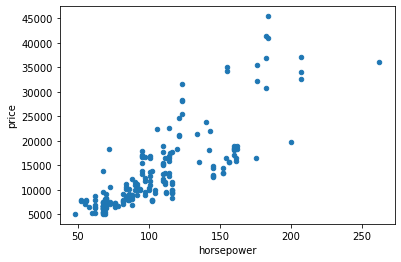

In [27]:
df.plot(kind='scatter',x='horsepower',y='price')

degree 3 ,score 0.6642087010842794


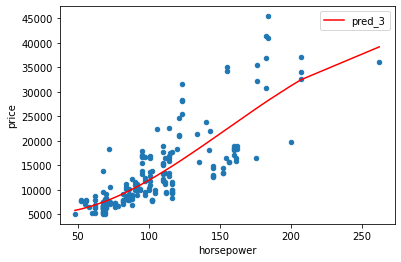

In [28]:
degree=3
pf=PolynomialFeatures(degree)
pX=pf.fit_transform(X)
model=LinearRegression()
model.fit(pX,y)
df[f'pred_{degree}']=model.predict(pf.transform(X))
ax=df.plot(kind='scatter',x='horsepower',y='price')
df.plot(x='horsepower',y=f'pred_{degree}',color='red',ax=ax)
mae=mean_absolute_error(y,df[f'pred_{degree}'])
print('degree',degree,',score',model.score(pf.transform(X),y))
plt.show()